In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

# checking overall data

In [265]:
train_data, test_data = load_titanic_data()

In [197]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [198]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [199]:
dummy_train_data = train_data.copy()
dummy_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
dummy_train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

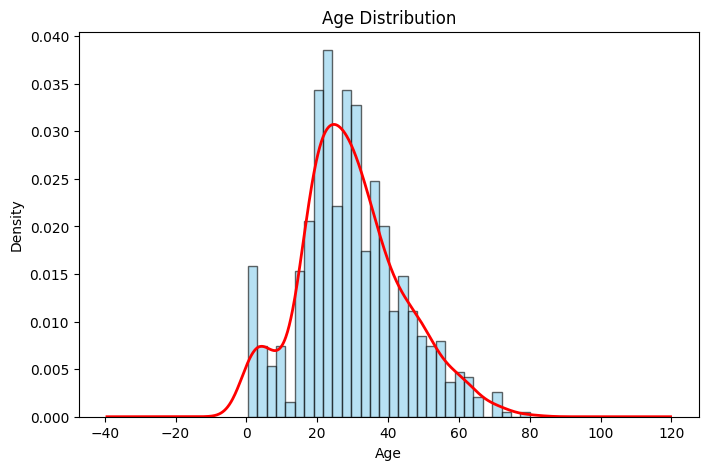

In [201]:
import matplotlib.pyplot as plt

age_data = dummy_train_data['Age'].dropna()
plt.figure(figsize=(8, 5))
plt.hist(age_data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
age_data.plot(kind='kde', color='red', linewidth=2)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [202]:
def add_engineered_features(df):
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
    df["IsAlone"] = (df["FamilySize"] == 1).astype(int)
    
    df["Title"] = df["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
    df["Title"] = df["Title"].replace(['Lady', 'Countess','Capt','Col','Don', 'Dr',
                                       'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df["Title"] = df["Title"].replace(['Mlle', 'Ms'], 'Miss')
    df["Title"] = df["Title"].replace('Mme', 'Mrs')
    
    return df

In [203]:
train_data = add_engineered_features(train_data)
test_data = add_engineered_features(test_data)

In [204]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [205]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs


In [162]:
test_data.set_index("PassengerId", inplace=True)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,0,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,0,Mrs


In [88]:
def drop_unwanted_columns(df):
    return df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [163]:
train_data["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [164]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [207]:
train_data.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [208]:
test_data.drop(columns=["Name", "Ticket", "Cabin"], inplace=True)

In [209]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,892,3,male,34.5,0,0,7.8292,Q,1,1,Mr
1,893,3,female,47.0,1,0,7.0000,S,2,0,Mrs
2,894,2,male,62.0,0,0,9.6875,Q,1,1,Mr
3,895,3,male,27.0,0,0,8.6625,S,1,1,Mr
4,896,3,female,22.0,1,1,12.2875,S,3,0,Mrs


In [210]:
dummy_train_data = train_data.copy()

In [211]:
dummy_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,1,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,0,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,1,Mr


In [212]:
dummy_x = dummy_train_data.drop(columns=["Survived"])
dummy_y = dummy_train_data["Survived"]

In [213]:
dummy_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,22.0,1,0,7.2500,S,2,0,Mr
1,1,female,38.0,1,0,71.2833,C,2,0,Mrs
2,3,female,26.0,0,0,7.9250,S,1,1,Miss
3,1,female,35.0,1,0,53.1000,S,2,0,Mrs
4,3,male,35.0,0,0,8.0500,S,1,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,1,1,Rare
887,1,female,19.0,0,0,30.0000,S,1,1,Miss
888,3,female,NaN,1,2,23.4500,S,4,0,Miss
889,1,male,26.0,0,0,30.0000,C,1,1,Mr


In [214]:
dummy_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [215]:
from sklearn.model_selection import train_test_split
dummy_x_train,dummy_x_test, dummy_y_train, dummy_y_test = train_test_split(dummy_x, dummy_y, test_size=0.2, random_state=42)

In [216]:
dummy_x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
331,1,male,45.5,0,0,28.5000,S,1,1,Mr
733,2,male,23.0,0,0,13.0000,S,1,1,Mr
382,3,male,32.0,0,0,7.9250,S,1,1,Mr
704,3,male,26.0,1,0,7.8542,S,2,0,Mr
813,3,female,6.0,4,2,31.2750,S,7,0,Miss


In [218]:
dummy_y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [172]:
dummy_x["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [173]:
dummy_x["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [175]:
dummy_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Model Selection

In [219]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [220]:
dummy_x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
331,1,male,45.5,0,0,28.5000,S,1,1,Mr
733,2,male,23.0,0,0,13.0000,S,1,1,Mr
382,3,male,32.0,0,0,7.9250,S,1,1,Mr
704,3,male,26.0,1,0,7.8542,S,2,0,Mr
813,3,female,6.0,4,2,31.2750,S,7,0,Miss
...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S,1,1,Miss
270,1,male,NaN,0,0,31.0000,S,1,1,Mr
860,3,male,41.0,2,0,14.1083,S,3,0,Mr
435,1,female,14.0,1,2,120.0000,S,4,0,Miss


In [221]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("one_hot", OneHotEncoder(handle_unknown="ignore"))
])
num_attribs = ["Age","Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked","Title","SibSp","Parch", "FamilySize","IsAlone"]

In [222]:
pre_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [224]:
dummy_x_train = pre_pipeline.fit_transform(dummy_x_train)

In [232]:
dummy_x_train

<712x40 sparse matrix of type '<class 'numpy.float64'>'
	with 7120 stored elements in Compressed Sparse Row format>

In [231]:
dummy_y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [234]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(dummy_x_train, dummy_y_train)

RandomForestClassifier(random_state=42)

In [236]:
dummy_x_train = dummy_x_train.reshape(-1, 1) 

In [249]:
dummy_x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
709,3,male,NaN,1,1,15.2458,C,3,0,Master
439,2,male,31.0,0,0,10.5000,S,1,1,Mr
840,3,male,20.0,0,0,7.9250,S,1,1,Mr
720,2,female,6.0,0,1,33.0000,S,2,0,Miss
39,3,female,14.0,1,0,11.2417,C,2,0,Miss
...,...,...,...,...,...,...,...,...,...,...
433,3,male,17.0,0,0,7.1250,S,1,1,Mr
773,3,male,NaN,0,0,7.2250,C,1,1,Mr
25,3,female,38.0,1,5,31.3875,S,7,0,Mrs
84,2,female,17.0,0,0,10.5000,S,1,1,Miss


In [250]:
dummy_y_test


709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [251]:
dummy_x_test = pre_pipeline.transform(dummy_x_test)

In [252]:
from sklearn.model_selection import cross_val_score,GridSearchCV

scores = cross_val_score(model, dummy_x_test, dummy_y_test, cv=5)
print("Cross-val accuracy:", scores.mean())


Cross-val accuracy: 0.7823809523809524


In [254]:
forest_grid_search = GridSearchCV(model, param_grid={
    "n_estimators": [50, 100, 200],
    "max_features": [2, 3, 4],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
forest_grid_search.fit(dummy_x_test, dummy_y_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [255]:
forest_grid_search.best_estimator_

RandomForestClassifier(max_depth=5, max_features=2, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=50, random_state=42)

In [256]:
forest_grid_search.best_score_

0.7992063492063493

In [257]:
forest_best_model = forest_grid_search.best_estimator_

# test it on test data

In [258]:
scores = cross_val_score(forest_best_model, dummy_x_test, dummy_y_test, cv=5)
print("Cross-val accuracy:", scores.mean())

Cross-val accuracy: 0.7992063492063493


In [260]:
test_data

<418x40 sparse matrix of type '<class 'numpy.float64'>'
	with 4178 stored elements in Compressed Sparse Row format>

In [244]:
test_data = pre_pipeline.transform(test_data)

In [261]:
y = forest_best_model.predict(test_data)

In [262]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [263]:
test_data.set_index("PassengerId", inplace=True)

AttributeError: 'csr_matrix' object has no attribute 'set_index'

In [267]:
test_data.set_index("PassengerId", inplace=True)

In [268]:
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [269]:
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [271]:
submission2 = pd.DataFrame({
    "PassengerId": test_data.index,
    "Survived": y
})

In [272]:
submission2.head()
submission2.to_csv("submission2.csv", index=False)